In [211]:
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt
import os




In [200]:
data=tf.data.Dataset.list_files("/Users/Georg/Downloads/lfw-deepfunneled/*/*")

In [206]:
def give_label(file_path):
    parts = tf.strings.split(file_path, os.path.sep)
    return parts[-2] == "George_W_Bush"

def decode_img(img):
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    return tf.image.resize(img, [width, height])

def process_path(file_path):
    print(type(file_path))
    title=give_label(file_path)
    img = tf.io.read_file(file_path)
    img = decode_img(img)
    return img,title


In [241]:
labeled_ds = data.map(process_path)
type(labeled_ds)

<class 'tensorflow.python.framework.ops.Tensor'>


tensorflow.python.data.ops.dataset_ops.DatasetV1Adapter

<tf.Tensor: id=1335, shape=(), dtype=bool, numpy=False>

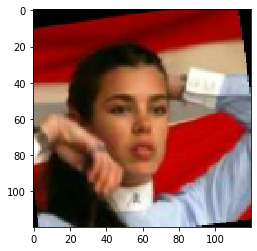

In [212]:
a=next(iter(labeled_ds))
plt.imshow(a[0].numpy())
(a[1])

<tf.Tensor: id=1328, shape=(), dtype=bool, numpy=True>

In [236]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (4,4), strides=(1,1), activation="relu", input_shape=(120, 120,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(16, (4,4), strides=(1,1), activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(16, (4,4), strides=(1,1), activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(16, (4,4), strides=(1,1), activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(16, (2,2), strides=(1,1), activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [237]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 117, 117, 16)      784       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 58, 58, 16)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 55, 55, 16)        4112      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 27, 27, 16)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 24, 24, 16)        4112      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 9, 9, 16)        

In [238]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [240]:

model.fit(labeled_ds, epochs=20)

Epoch 1/20
      1/Unknown - 0s 59ms/step

ValueError: Error when checking input: expected conv2d_21_input to have 4 dimensions, but got array with shape (120, 120, 3)